<a href="https://colab.research.google.com/github/finaorivia19/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – GLOBAL THRESHOLDING
*   Nama : Fina Orivia Nurfadillah
*   Absen : 08
*   NIM  : 2141720256





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install pytesseract

In [6]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

**TUGAS NOMOR 3**
Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

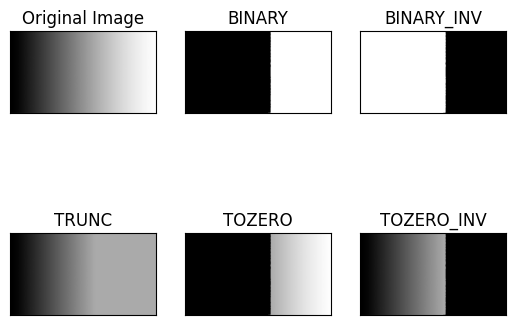

In [7]:
filename_1 = ('/content/drive/MyDrive/image/gradient.jpg')

#menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

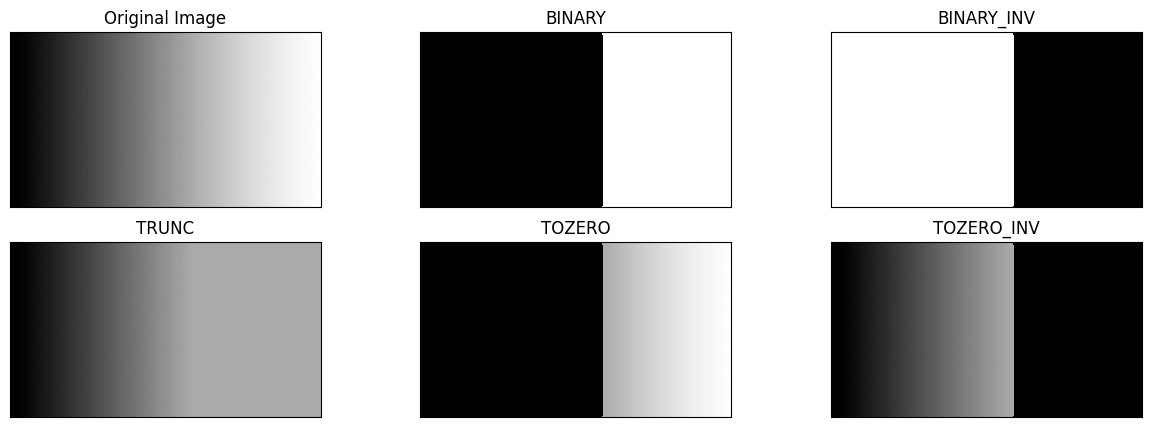

In [9]:
#tanpa menggunakan library
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170 #nilai threshold yang telah ditentukan

#Original image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#Binary threshold inverse
thresh2 = 255 - thresh1

#Threshold Truncate
thresh3[img_g>thresh] = thresh

#Threshold Tozero
thresh4[img_g<=thresh] = 0

#Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**TUGAS NOMOR 4**
Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-12-0fa28b1cd59c>:28: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-12-0fa28b1cd59c>:29: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb) / wf


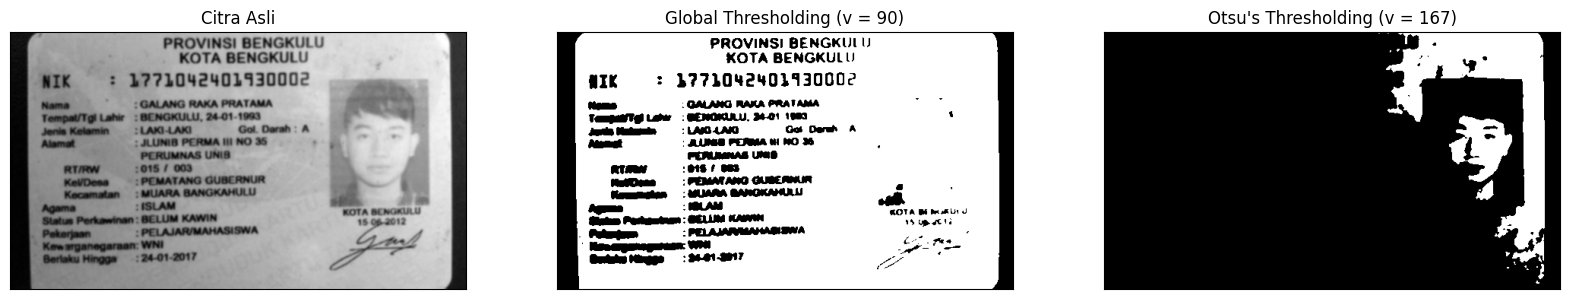

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#mengimpor gambar
filename_1 = ('/content/drive/MyDrive/image/ktp1.png')
img_lgs = cv2.imread(filename_1, 0)

#menggunakan gaussian blur
blur = cv2.GaussianBlur(img_lgs, (5, 5), 0)

#hitung histogram
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])

hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0, 256):
    wb += hist[i]
    wf = (img_lgs.shape[0] * img_lgs.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)

    if (betweenvar > varmax):
      varmax = betweenvar
      thresh = i

#Ganti nilai threshold ke 167
thresh = 167

x = "Otsu's Thresholding (v = " + str(thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(20, 15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1)
  plt.imshow(citra3[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**TUGAS NOMOR 5**
Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv%02tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

In [ ]:
#nomor 5
filename_2 = ('/content/drive/MyDrive/image/ktp2.png')
img_1 = cv2.imread(filename_2)
img_rgb = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.
